# Part A 
## Name : Joel Poah
## Class: DAAA/2B/06
## Admin No: 2112729

In [62]:
# pip install tensorflow

In [63]:
# conda install pandas

In [64]:
# conda install seaborn

In [65]:
# conda install scikit-learn

In [66]:
# conda install plotly

In [67]:
# pip install --upgrade nbformat

# Deep learning classifcation on Fashion MNIST 

## Overview 
### Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.
| Label       | Description |
| ----------- | ----------- |
| 0           | T-shirt/Top |
| 1           | Trouser     |
| 2           | Pullover    |
| 3           | Dress       |
| 4           | Coat        |
| 5           | Sandal      |
| 6           | Shirt       |
| 7           | Sneaker     |
| 8           | Bag         |
| 9           | Ankle Boot  |


In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
data = tf.keras.datasets.fashion_mnist.load_data()
# (X_train, y_train), (X_test, y_test) = data

# split data into train , test and validation
X_train, X_test, y_train, y_test = train_test_split(data[0][0], data[0][1], test_size=0.2, random_state=42) 
# 80% train, 20% test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42) # 0.2 x 0.8 = 0.16 = 16% of original data
# we have 64% train,20% test,16% validation

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)





(40800, 28, 28) (12000, 28, 28)
(40800,) (12000,)


In [69]:
X_train_df = pd.DataFrame(X_train.reshape(-1, 784))
y_train_df = pd.DataFrame(y_train)
X_train_df


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,5,0,11,177,119,65,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,2,0,0,...,128,80,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,146,...,136,31,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40795,0,0,0,0,0,0,2,2,0,37,...,69,0,0,1,0,0,0,0,0,0
40796,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
40797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40798,0,0,0,0,0,0,0,0,0,0,...,89,51,0,0,0,0,0,0,0,0


# pixel normalization
> Dividing each of the pixels by 255 will normalize the pixels between 0 to 1 
We normalize the pixels so that it can increase the speed of the learning process
Neural Network processes inputs uses small weights values. Large inputs can disrupt or slow down learning process.
It is good that we normalize the pixels

In [70]:
print(X_train.min(), X_train.max())
# it seems like the data set provided by tensorflow is already between 0 to 255 . We can normalize it by dividing by 255 or so called pixel normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
# X_val = X_val / 255.0


0 255


In [71]:
types = y_train_df[0].unique()
types.sort()
print(types)
print(y_train_df[0].value_counts())
# y_ train is just an array of numbers from 0 to 9 that represent the class of the image

[0 1 2 3 4 5 6 7 8 9]
7    4125
3    4107
0    4088
1    4082
6    4080
4    4078
5    4074
2    4065
9    4054
8    4047
Name: 0, dtype: int64


In [72]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


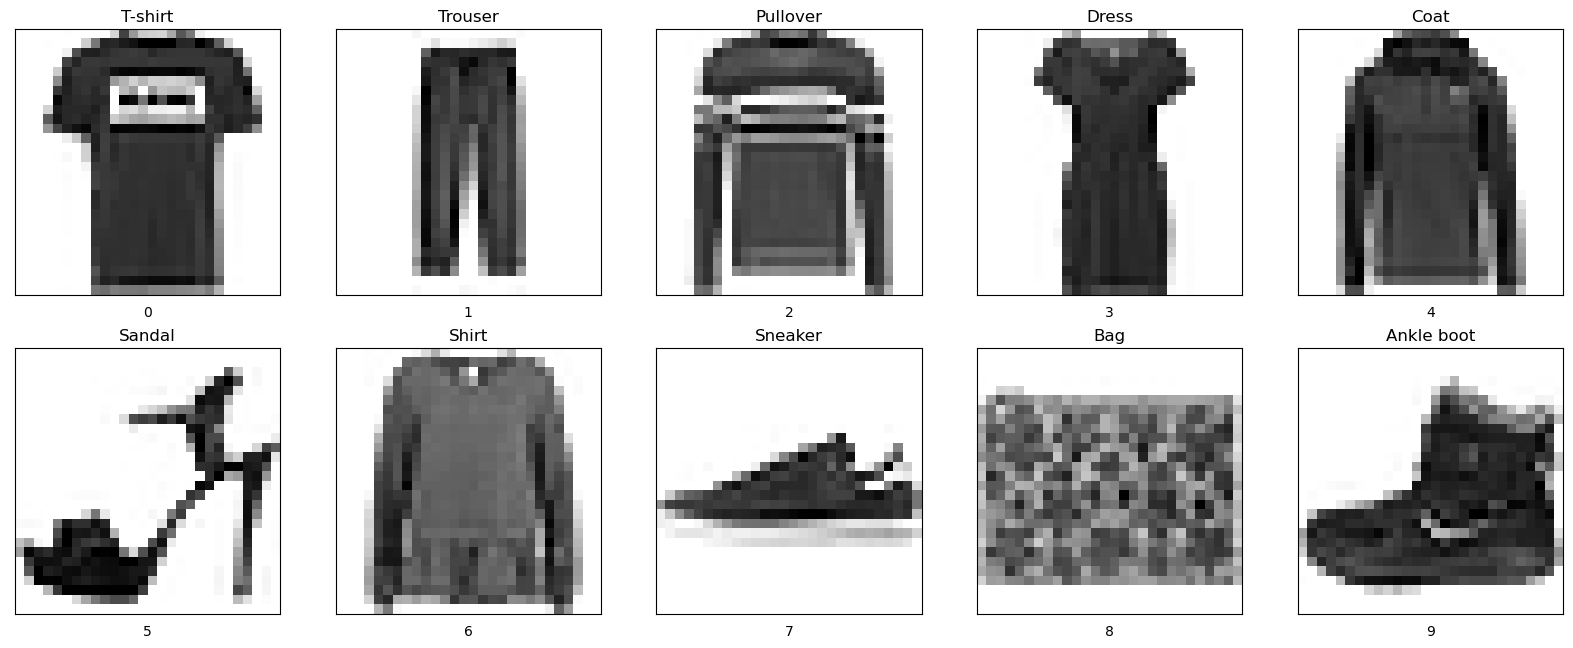

In [73]:
array_of_each_class_position = [1,21,5,20,24,9,18,6,23,0]
# plot all images in array_of_each_class_position
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_names[i])
    plt.imshow(data[0][0][array_of_each_class_position[i]], cmap=plt.cm.binary)
    plt.xlabel(data[0][1][array_of_each_class_position[i]])
plt.show()

- X_train: uint8 NumPy array of grayscale image data with shapes (, 28, 28), containing the training data.

- y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

- X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

- y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

# Dense Neural Network / Multi layer perceptrons (MLPs) 
## MLP is a Artificial Neural Network consisting of at least 3 layers ( input , hidden layer and output) 

![](./images/DenseNN.gif) 

## **Trying out Dense neural networks** 
### 1 Layered Densely connected neural network 
- It is 1 dimensional 
- image was 28 by 28 pixels but flattened to an array of attributes (784) 
- Neural network takes in 784 columns of attributes as inputs and pass to 128 neurons in the example shown below
- Hidden layer then passes to the sigmoid function which generates a prediction percentage for the 10 classes

#### Things i discovered while experimenting with 1 layered dense neural network
- loss='sparse_categorical_crossentropy" is used for label encoded data
- input shape of the Dense layer have to match the amount of attributes in dataset or else error thrown

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 128)               100480    
                                                                 
 dense_79 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1275/1275 - 3s - loss: 0.5381 - accuracy: 0.8127 - 3s/epoch - 3ms/step
Epoch 2/5
1275/1275 - 3s - loss: 0.4019 - accuracy: 0.8562 - 3s/epoch - 2ms/step
Epoch 3/5
1275/1275 - 3s - loss: 0.3569 - accuracy: 0.8697 - 3s/epoch - 2ms/step
Epoch 4/5
1275/1275 - 3s - loss: 0.3322 - accuracy: 0.8786 - 3s/epoch - 2ms/step
Epoch 5/5
1275/1275 - 3s - loss: 0.3074 - accuracy: 0.8868 - 3s/epoch - 2ms/step
375/375 - 1s - loss: 0.3269 - accuracy

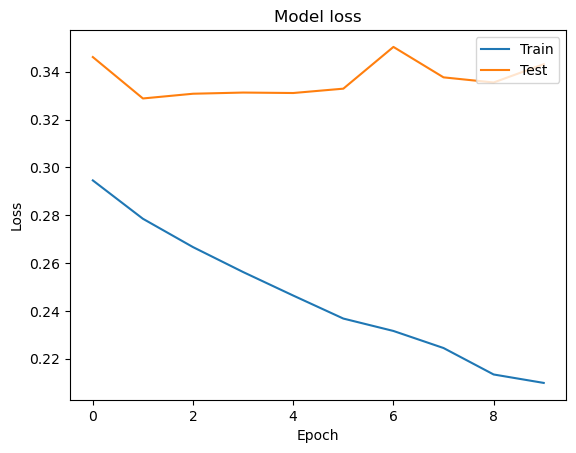

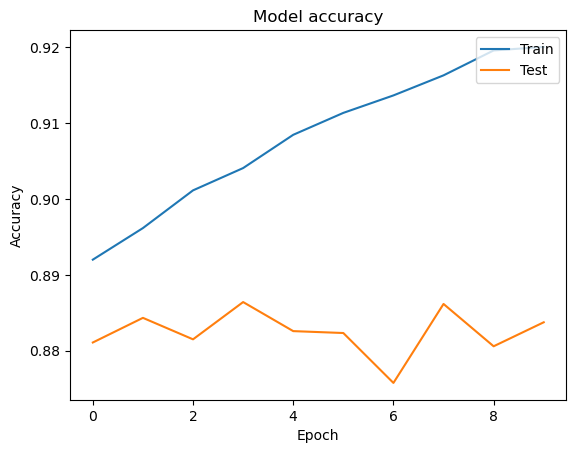

In [74]:
# Baseline simple neural network
from tensorflow.keras.layers import Flatten
# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28)),
#         layers.Flatten(),
#         layers.Dense(128, activation="relu"), # 128 neurons
#         layers.Dense(10,activation='sigmoid')                  # 10 neurons as there are 10 types of fashion clothing

#     ]
# )
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

model = Sequential()



model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.summary()


model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, verbose=2)
results=model.evaluate(X_test, y_test,verbose=2)
print("test loss,", results[0], "test acc:", results[1])

# Train your model and save its history
def plot_loss(loss,test_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(test_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,test_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
  
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h_callback = model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


### 2 layer Dense Neural network
> Baseline model with at least 2 layers which performs slightly better than 1 layer
However 2 layered model is clearly overfitted where testing learning curve diverges away from training learning curve 
and only performs a little better than model with 1 layer

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 128)               100480    
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dense_82 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1275/1275 [==============================] - 5s 4ms/step - loss: 0.5382 - accuracy: 0.8085 - val_loss: 0.4222 - val_accuracy: 0.8459
Epoch 2/5
1275/1275 [==============================] - 5s 4ms/step - loss: 0.3972 - accuracy: 0.8553 - val_loss: 0.3825 - val_accuracy: 0.8576
Epoch 3/5
1275/1275 [====

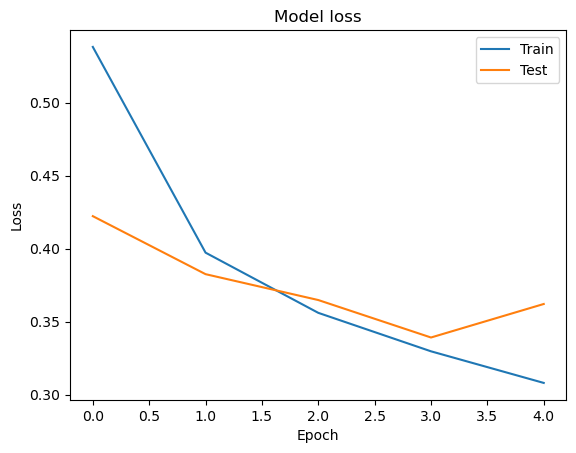

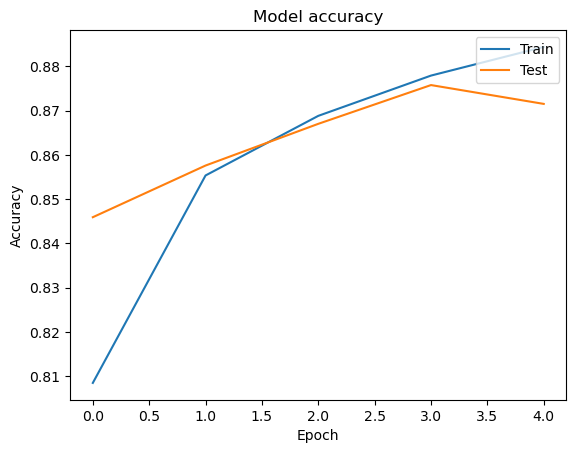

In [75]:
# Baseline simple neural network
# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28)),
#         layers.Flatten(),
#         layers.Dense(128, activation="relu"), # 128 neurons
#         layers.Dense(10,activation='sigmoid')                  # 10 neurons as there are 10 types of fashion clothing

#     ]
# )


#flatten X_train and X_test


model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

h_callback = model.fit(X_train, y_train,epochs = 5,
               validation_data=(X_test, y_test))

results=model.evaluate(X_test, y_test, batch_size=32, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])



### 3 layered MLP 
#### Backward propagation behind the scenes of a MLP Artificial Neural Network
![](./images/Backpropagation.gif)  ![](./images/GradientDescent.gif) 
- Understood why with every epoch accuracy is increased
- BackwardPropagation adjusts weights using calculas(gradient descent) finding global minimum error of the function





Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 128)               100480    
                                                                 
 dense_84 (Dense)            (None, 64)                8256      
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 dense_86 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1275/1275 [==============================] - 6s 4ms/step - loss: 0.5512 - accuracy: 0.8048 - val_loss: 0.4283 - val_accuracy: 0.8461
Epoch 2/10
1275/1275 [=============

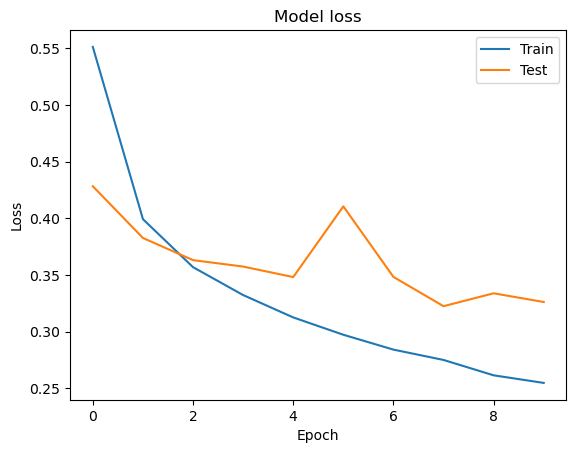

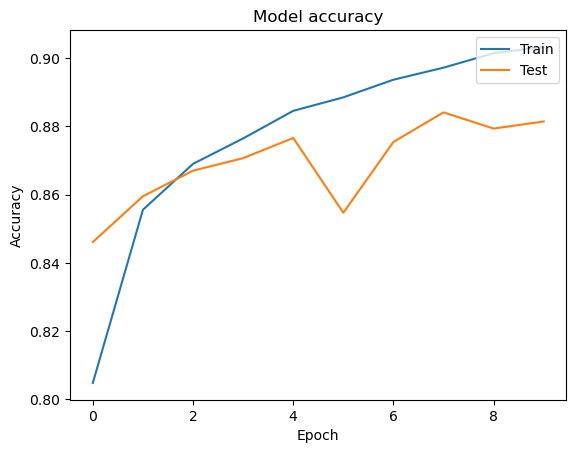

In [76]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

h_callback = model.fit(X_train, y_train,epochs = 10,
               validation_data=(X_test, y_test))

results=model.evaluate(X_test, y_test, batch_size=32, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])



225/225 [==============================] - 0s 2ms/step


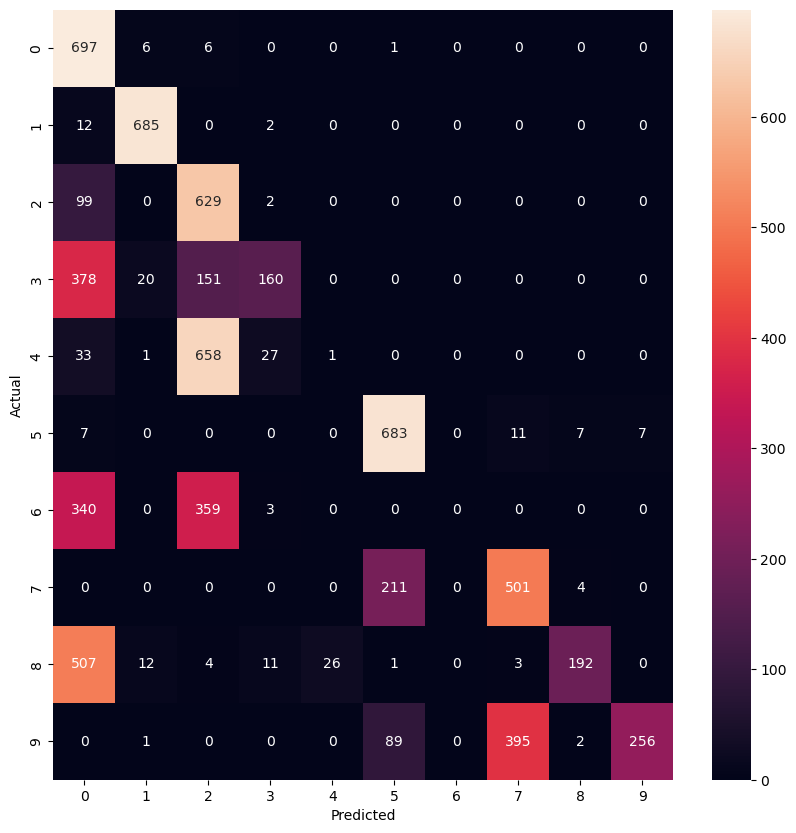

In [77]:
X_val = X_val.reshape(X_val.shape[0], 784,1)
pred=model.predict(X_val)
pred=np.argmax(pred,axis=1)
classifation_matrix=confusion_matrix(y_val,pred)
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix,annot=True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Conclusion
pros
- simple model
- easier to build 

cons
- can't alter input size after model is trained
- permutation invariance , everything is fully connected as they are dense layers
- Cannot perform well on those images that have the same shape

### As shown on classification matrix , this dense neural network don't perform well on classes 9(Ankle Boots) and 7(Sneaker) and 5(Sandal)

# Convolutional Neural Network (CNN)


![](./images/IntroCNN.jpeg)

## Documentation of how Convolving or Applied Filtering works in CNN
Saily Shah — Published On January 27, 2022 and Last Modified On March 15th, 2022
Shah,S *Convolutional Neural Network: An Overview* Available at: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c[Accessed : 4 november 2022 ]
> Convolve ~ combine (one function or series) with another by forming their convolution which is also summing the element-wise product of 2 matrices (Shah,S 2022)

![](./images/convolved_z.png)
- Dot product performed between input and filter( filter is a measure of how close a region of the input resembles a feature; it can be a vertical line,horizontal edge or diagonal)
- values found in filter(2nd matrix, *filter is also known as the kernel_size in keras*) are the weights that will be learned and tuned with backpropagation( finding global minimum error of function) in the training of the network 
- sum of the product of the matrix is 70 here
> Striding convolutions : repeating what happen above but with strides; the filter moving through the image and getting a matrix of convolved features. The main purpose of doing this is to find features of a class which will then be used for classification of the images

> ![](./images/convolve.gif)
- final matrix(convolved matrix) produced is smaller after retrieving main features of an image




## Documentation of how Pooling works in CNN
![](./images/Pooling.gif)
- Reducing spatial size this helps *reduce computational power to process data* (also known as dimensionality reduction)
- Helps in retrieving dominant features
### Max Pooling
- With every stride the highest number found is retrieved in an area
- Effective as a noise suppresant discarding all noisy activations and only taking the prominant feature in an area 

### Average Pooling 
- Retrieves the average of all the values in an area
- may not perform as well as max pooling since it is just averaging the noise in images


## Why do we need Flattening
- Pooled feature maps are 2 Dimensional arrays 
- Usually Dense layers are used at the last part of CNNs which requires flatten or else there will be an error
- convert data into a 1 dimensional array in order to pass to the fully connected layer using Flatten
- Flatten is required unless last layer uses global pooling

## General conclusion on Convolving and Pooling
> Convolving helps neural network extract features performing better than MLP. My hypothesis for this problem is that I think Max pooling may perform better but will try it out . 



In [78]:
# Functions for plotting
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename=f'accuracy-loss_{train_model}')
    

## CNN (stupid baseline)


In [83]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
epochs = 15
num_classes = 10
print('before',X_train.shape,X_test.shape)
print('before',y_train.shape,y_test.shape)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
# print('after',X_train.shape,X_test.shape)
# print('after',y_train.shape,y_test.shape)




fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



before (40800, 28, 28, 1) (12000, 28, 28, 1)
before (40800,) (12000,)
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_87 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 flatten_39 (Flatten)        (None, 36864)             0         
                                                                 
 dense_93 (Dense)            (None, 128)               4718720   
                                                                 
 dense_94 (Dense)            (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_______________________________________

c:\Users\Admin\.conda\envs\gpu_env\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Added batch sizing to see if it affects

In [85]:
fashion_model_batch = Sequential()
fashion_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batch.add(Flatten())
fashion_model_batch.add(Dense(128, activation='linear'))
fashion_model_batch.add(Dense(num_classes, activation='softmax'))

fashion_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batch.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10, batch_size=64,validation_data=(X_test, y_test))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_92 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 flatten_41 (Flatten)        (None, 36864)             0         
                                                                 
 dense_97 (Dense)            (None, 128)               4718720   
                                                                 
 dense_98 (Dense)            (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
638/638 [=======================

#### Batch sizing does improve performance slightly 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

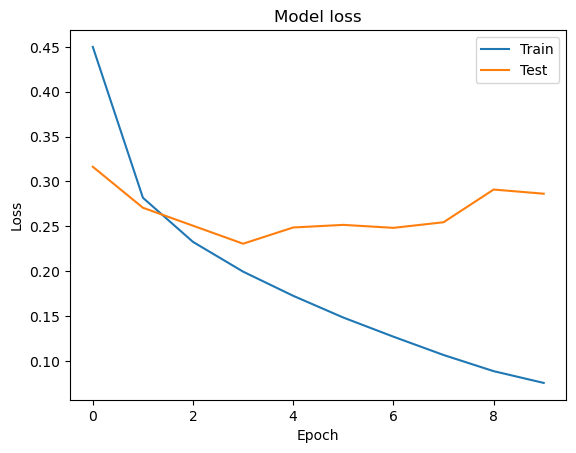

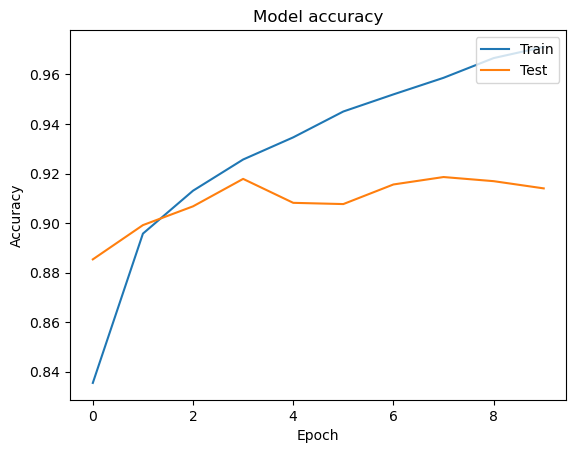

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)


batch_size = 64
epochs = 15
num_classes = 10


# define cnn model
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

### linear activation does not seem to perform well 

### Trying out relu

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
epochs = 15
num_classes = 10
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
fashion_model.add(MaxPooling2D((2, 2)))
fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 128)       

c:\Users\Admin\.conda\envs\gpu_env\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Trying out tanh

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
epochs = 15
num_classes = 10
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(28,28,1)))
fashion_model.add(MaxPooling2D((2, 2)))
fashion_model.add(Conv2D(64, (3, 3), activation='tanh'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Conv2D(128, (3, 3), activation='tanh'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 128)       

## Trying out Sigmoid

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
epochs = 15
num_classes = 10
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=(28,28,1)))
fashion_model.add(MaxPooling2D((2, 2)))
fashion_model.add(Conv2D(64, (3, 3), activation='sigmoid'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Conv2D(128, (3, 3), activation='sigmoid'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='sigmoid'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 128)       

conv2d_12 (3, 3, 1, 32)


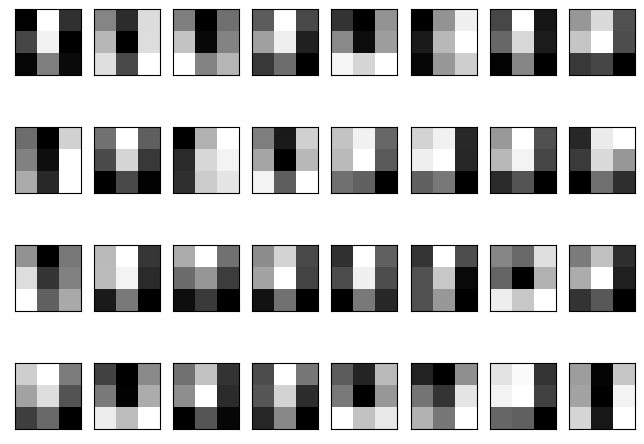

In [ ]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = fashion_model.layers #Conv layers at 0, 
filters, biases = fashion_model.layers[0].get_weights()
print(layer[0].name, filters.shape)

# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = 32 ## the number of filters in our first layer 
for i in range(1, n_filters + 1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

Epoch 1/10
1275/1275 [==============================] - 6s 4ms/step - loss: 0.4521 - accuracy: 0.8408 - val_loss: 0.3359 - val_accuracy: 0.8800
Epoch 2/10
1275/1275 [==============================] - 5s 4ms/step - loss: 0.3107 - accuracy: 0.8910 - val_loss: 0.3116 - val_accuracy: 0.8884
Epoch 3/10
1275/1275 [==============================] - 5s 4ms/step - loss: 0.2611 - accuracy: 0.9069 - val_loss: 0.2854 - val_accuracy: 0.8947
Epoch 4/10
1275/1275 [==============================] - 5s 4ms/step - loss: 0.2277 - accuracy: 0.9173 - val_loss: 0.2804 - val_accuracy: 0.8998
Epoch 5/10
1275/1275 [==============================] - 5s 4ms/step - loss: 0.1940 - accuracy: 0.9305 - val_loss: 0.2743 - val_accuracy: 0.9028
Epoch 6/10
1275/1275 [==============================] - 5s 4ms/step - loss: 0.1702 - accuracy: 0.9384 - val_loss: 0.2904 - val_accuracy: 0.9017
Epoch 7/10
1275/1275 [==============================] - 5s 4ms/step - loss: 0.1475 - accuracy: 0.9462 - val_loss: 0.3025 - val_accuracy:

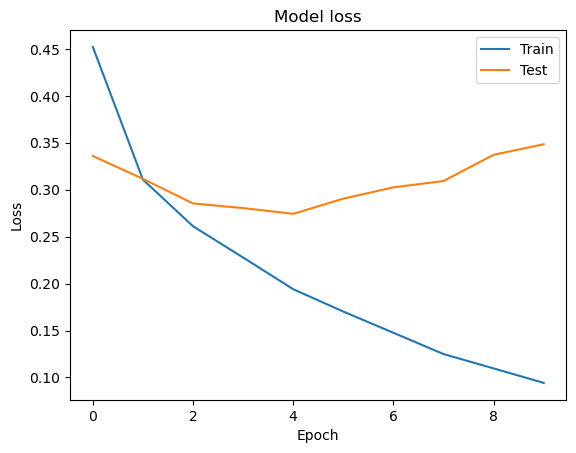

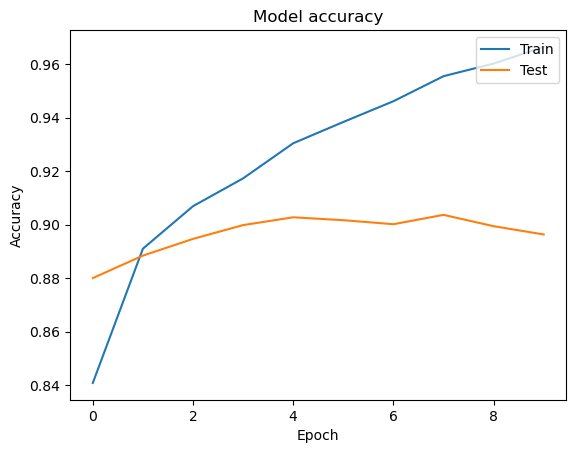

In [ ]:
# Import the Conv2D and Flatten layers and instantiate model
# reshape dataset to have a single channel

model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'sigmoid'))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h_callback = model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


## Trying out different activations 
![](./images/relu.png) 

# Adding dropout

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 24)        6936      
                                                      

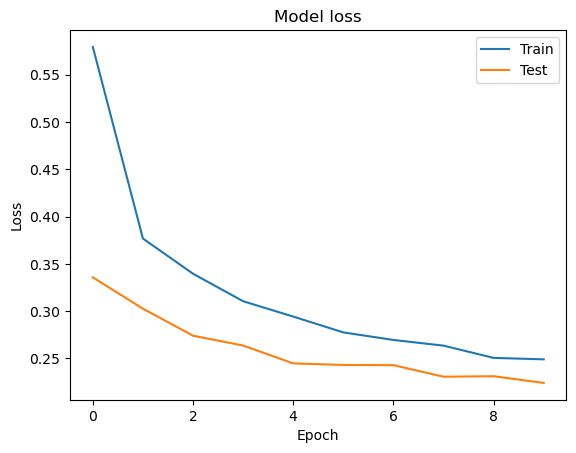

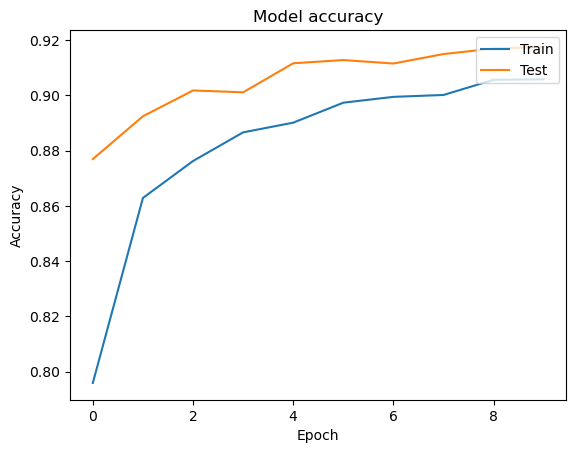

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))
model_2.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
model_2.add(Dropout(0.4))
model_2.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.3))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

model_2.summary()

h_callback = model_2.fit(X_train, y_train, epochs = 10,
                validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

# Trying out different optimizers

## Stochastic Gradient Descent (SGD)
> Instead of computing the gradients over the entire dataset, it performs a parameter update for each example in the dataset.The problem of SGD is that the updates are frequent and with a high variance, so the objective function heavily fluctuates during training.This fluctuation can be an advantage with respect to batch gradient descent because it allows the function to jump to better local minima, but at the same time it can represent a disadvantage with respect to the convergence in a specific local minima.

## Adagrad
>It adapts the learning rate to the parameters performing small updates for frequently occurring features and large updates for the rarest ones.In this way, the network is able to capture information belonging to features that are not frequent, putting them in evidence and giving them the right weight.The problem of Adagrad is that it adjusts the learning rate for each parameter according to all the past gradients. So, the possibility of having a very small learning rate after a high number of steps — resulting from the accumulation of all the past gradients — is relevant.If the learning rate is too much small, we simply can’t update weights and the consequence is that the network doesn’t learn anymore.

## Adadelta
> It improves the previous algorithm by introducing a history window which sets a fixed number of past gradients to take in consideration during the training.In this way, we don’t have the problem of the vanishing learning rate.

## RMSprop
>It is very similar to Adadelta. The only difference is in the way they manage the past gradients.

## Adam
>It adds to the advantages of Adadelta and RMSprop, the storing of an exponentially decaying average of past gradients similar to momentum.

In [ ]:
def tune_model_2(hp):
    optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
    # activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    kernel_initializer='he_normal',
                    input_shape=(28,28,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    #loop through the optimizers
    for optimizer in optimizers:
        model.compile(optimizer=optimizer(hp.Choice('learning_rate',values=[1e-2,1e-4]),
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy']))


    model.summary()
    return model




## Introducing regularization


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 64)        

c:\Users\Admin\.conda\envs\gpu_env\lib\site-packages\keras\backend.py:5582: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



1275/1275 [==============================] - 9s 7ms/step - loss: 0.8399 - accuracy: 0.7451 - val_loss: 0.4890 - val_accuracy: 0.8397
Epoch 2/10
1275/1275 [==============================] - 8s 6ms/step - loss: 0.5077 - accuracy: 0.8313 - val_loss: 0.3894 - val_accuracy: 0.8689
Epoch 3/10
1275/1275 [==============================] - 8s 6ms/step - loss: 0.4374 - accuracy: 0.8539 - val_loss: 0.3639 - val_accuracy: 0.8772
Epoch 4/10
1275/1275 [==============================] - 8s 6ms/step - loss: 0.4041 - accuracy: 0.8649 - val_loss: 0.3268 - val_accuracy: 0.8898
Epoch 5/10
1275/1275 [==============================] - 8s 6ms/step - loss: 0.3762 - accuracy: 0.8746 - val_loss: 0.3135 - val_accuracy: 0.8963
Epoch 6/10
1275/1275 [==============================] - 8s 6ms/step - loss: 0.3565 - accuracy: 0.8816 - val_loss: 0.3169 - val_accuracy: 0.8959
Epoch 7/10
1275/1275 [==============================] - 8s 6ms/step - loss: 0.3464 - accuracy: 0.8858 - val_loss: 0.3074 - val_accuracy: 0.8963
Epo

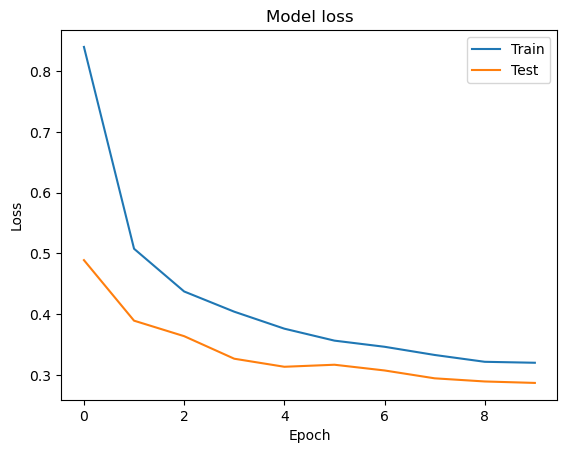

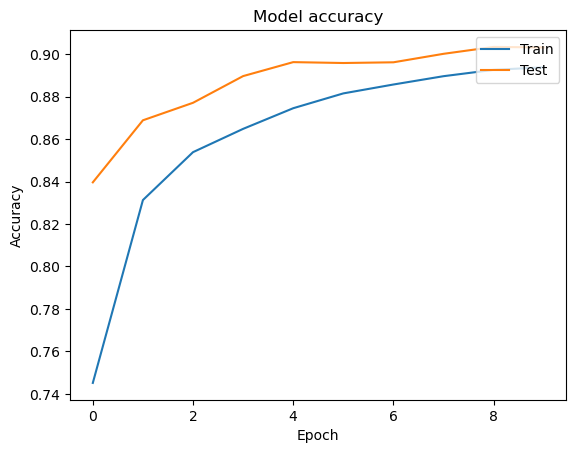

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L2(l2=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])  
model.summary()

h_callback = model.fit(X_train, y_train, epochs = 10,
                validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# Conv 2d by machine learning mastery
![](./images/convolutionalNN.png)

In [ ]:
print(X_train.shape,y_train.shape)

(40800, 28, 28, 1) (40800,)


In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
# reshape dataset to have a single channel
print(trainX.shape, testX.shape)
print(trainY.shape, testY.shape)
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainX=trainX/255
testX=testX/255
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
print(trainX.shape, testX.shape)
print(trainY.shape, testY.shape)
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
model.fit(trainX,trainY, verbose=0)
# evaluate model

h_callback = model.fit(trainX, trainY, epochs = 10,
               validation_data=(testX, testY))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


KeyboardInterrupt: 

> 91.042
> 91.925
> 91.258
> 90.900
> 90.975


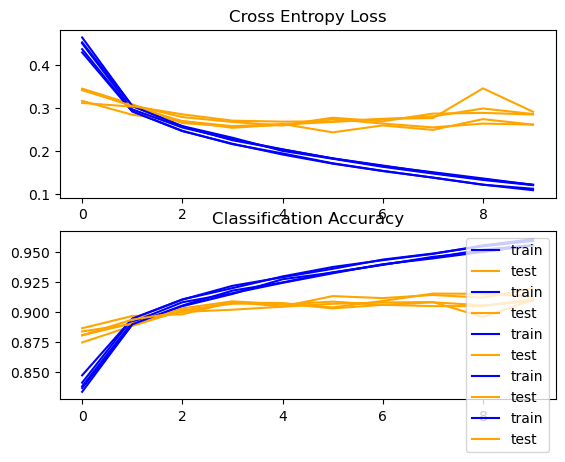

Accuracy: mean=91.220 std=0.372, n=5


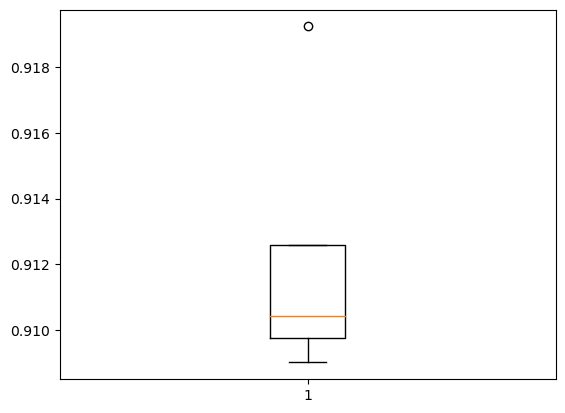

In [ ]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.legend()
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

# How well does it perform on validation?

225/225 [==============================] - 0s 1ms/step


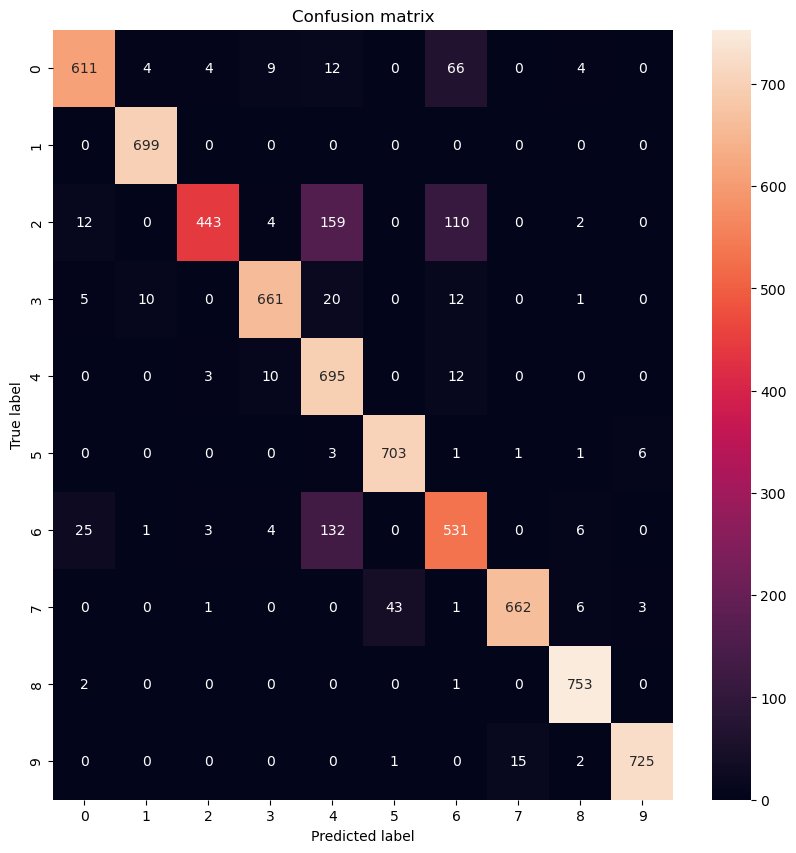

In [ ]:
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
y_val = to_categorical(y_val)
pred = model.predict(X_val)
pred = np.argmax(pred, axis=1)
y_val = np.argmax(y_val, axis=1)
classifation_matrix = confusion_matrix(y_val, pred)
# plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



## Results was a lot better as compared to the previous multilayer perceptron neural network
- There wasn't as much confusion between class 5 , 7 and 8 
### However we can still improve the model in predicting classes 2(pullover) , 4(Coat) and 6(Shirt) . Model also thinks that class 6(shirt) may be a class 0(T-shirt) occasionally it looks like the model may be confused because of the shape of the image 

# Improving on Machine Learning Mastery model 

> 90.542
> 90.525
> 90.525
> 90.875
> 91.092


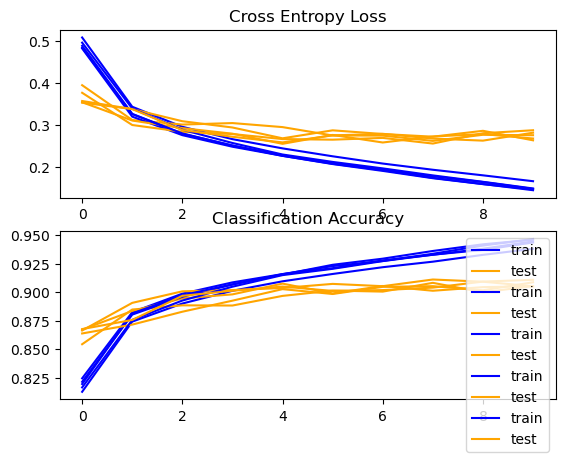

Accuracy: mean=90.712 std=0.232, n=5


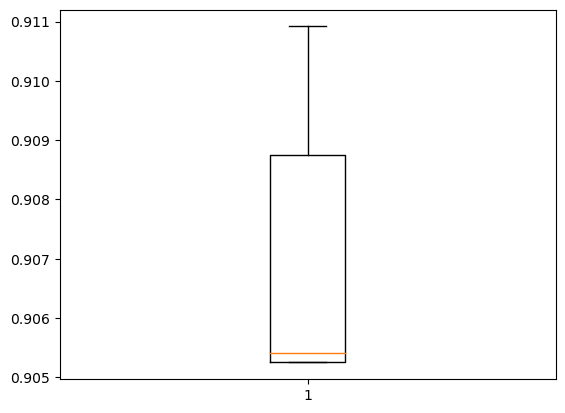

225/225 [==============================] - 0s 1ms/step


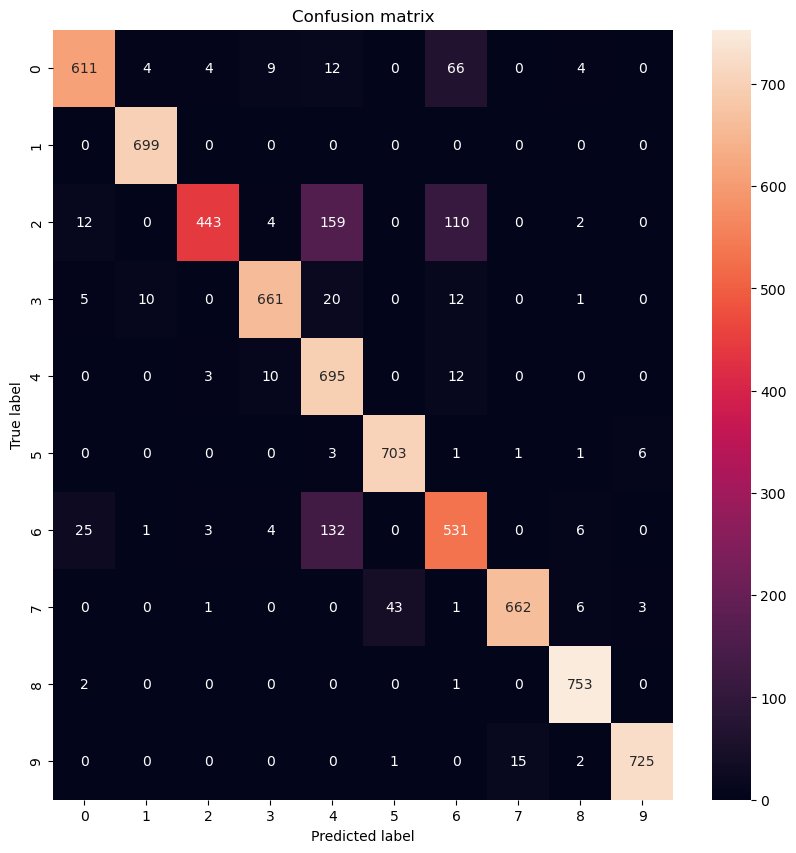

In [ ]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.legend()
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()


X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
y_val = to_categorical(y_val)
pred = model.predict(X_val)
pred = np.argmax(pred, axis=1)
y_val = np.argmax(y_val, axis=1)
classifation_matrix = confusion_matrix(y_val, pred)
# plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



# Attempting data augmentation to improve machine learning mastery code

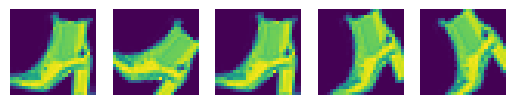

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(X_train)

from matplotlib import pyplot as plt

gen = datagen.flow(X_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Flatten())
model_2.add(Dense(10, activation='softmax'))
#loop through the optimizers
model_2.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
    
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 5, 5, 64)        

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 5)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('data_aug_best_model2_DO.hdf5', save_best_only = True)

In [ ]:
model_2_data_augmented = model_2.fit(X_train, y_train,  
        batch_size=256,
          epochs=50,
          verbose=1,
          callbacks = [monitor_val_acc, model_checkpoint],
          validation_data = (X_val, y_val))

Epoch 1/50


c:\Users\Admin\.conda\envs\gpu_env\lib\site-packages\keras\backend.py:5582: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



160/160 [==============================] - 2s 12ms/step - loss: 0.9154 - accuracy: 0.6581 - val_loss: 36.8398 - val_accuracy: 0.8039
Epoch 2/50
160/160 [==============================] - 1s 9ms/step - loss: 0.5578 - accuracy: 0.7900 - val_loss: 34.0725 - val_accuracy: 0.8418
Epoch 3/50
160/160 [==============================] - 1s 9ms/step - loss: 0.4825 - accuracy: 0.8216 - val_loss: 30.6414 - val_accuracy: 0.8594
Epoch 4/50
160/160 [==============================] - 1s 9ms/step - loss: 0.4333 - accuracy: 0.8384 - val_loss: 28.4368 - val_accuracy: 0.8593
Epoch 5/50
160/160 [==============================] - 1s 9ms/step - loss: 0.4008 - accuracy: 0.8533 - val_loss: 29.0932 - val_accuracy: 0.8557
Epoch 6/50
160/160 [==============================] - 1s 9ms/step - loss: 0.3709 - accuracy: 0.8654 - val_loss: 28.3199 - val_accuracy: 0.8621
Epoch 7/50
160/160 [==============================] - 2s 9ms/step - loss: 0.3580 - accuracy: 0.8683 - val_loss: 23.9241 - val_accuracy: 0.8733
Epoch 8/5

In [ ]:
print('Test accuracy:', model_2_data_augmented.model.evaluate(x_test, y_test))

NameError: name 'x_test' is not defined

In [ ]:
score = model_2_data_augmented.model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
accuracy = model_2_data_augmented.history['accuracy']
val_accuracy = model_2_data_augmented.history['val_accuracy']
loss = model_2_data_augmented.history['loss']
val_loss = model_2_data_augmented.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model_2_data_augmented.model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes)

In [ ]:
from sklearn.metrics import classification_report
#outputing as classifcation matrix to see the accuracy of each class

labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
#get the indices to be plotted
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]
target_names = ["Item {} {}".format(labels[i], i) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

# Take notes
- function to visualize graphs nicely can copy xavier's code
- how to k fold follow mastery
- everytime finish should try out on test score
- use a constant seed value ( initialization can be normalized refere to prac 3)
- have i used to_categorical and why should i?
- Batch size training with and without
- kernel_initializer in adding dense layer. It is to have normal distribution when randomly choosing the weights
- idea behind filtering , training the filters which then multiplies.
- max pooling and average pooling ( shrinking down the layers)
- Why is Flattening to 1D useful and comparison.
- dropout should be 0.2/0.5 to 0.8 in keras layer try dropout only
- batch normalization
- l2 regularization
- data augmentation



- general way to tell how many neurons is looking at data points then it should be comparable to the parameters( CNN comes in to make neurons in each layer of CNN smaller )

- All optimization tried and explained
- weight decay
- representation scarsity



- functional api merge cnn 
- LeNet
- AlexNet
- VGGNet
- GoogLeNet
- ResNet
- ZFNet

## things i don't understand 
- auto denoising and auto encoding

# 